<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./261_CAMS_eac4_load_browse.ipynb"><< 261 - CAMS - EAC4 Global Reanalysis</a><span style="float:right;"><a href="./271_GEFF_fire_forecast_load_browse.ipynb">271 - GEFF Global ECMWF Fire Forecasting >></a></span>

<div class="alert alert-block alert-success">
<b>20 - DATA DISCOVERY</b></div>

<div class="alert alert-block alert-success">

<b>SEE ALSO</b>

* **30 - CASE STUDIES**
 - [321 - Case study - Siberian fires - Summer 2019](../30_case_studies/321_Siberian_fires_summer_2019_case_study.ipynb) 

</div>

<hr>

# 2.6.2 CAMS - Global Fire Assimilation System (GFAS) - Load and browse

The Copernicus Atmopshere Monitoring Service (CAMS) provides consistent and quality-controlled information related to air pollution and health and greenhouse gases. CAMS data consist of `global forecasts and analyses`, `global reanalyses`, `fire emissions` and `greenhouse gas flux inversions`. 

This notebooks provides an introduction to the [CAMS Global Fire Assimilation System (GFAS) global fire emissions data](https://atmosphere.copernicus.eu/global-fire-emissions). The CAMS Global Fire Assimilation System (GFAS) assimilates fire radiative power (FRP) observations from satellite-based sensors to produce daily estimates of wildfire and biomass burning emissions. It also provides information about injection heights derived from fire observations and meteorological information from the operational weather forecasts of ECMWF.

The GFAS data output includes spatially gridded `Fire Radiative Power (FRP)`, `dry matter burnt` and `biomass burning emissions` for a large set of chemical, greenhouse gas and aerosol species. Data are available globally on a regular latitude-longitude grid with horizontal resolution of 0.1 degrees from 2003 to present.

CAMS GFAS data are available in either `GRIB` or `netCDF` format. Get more information in the [CAMS GFAS data documentation](https://atmosphere.copernicus.eu/sites/default/files/2018-05/CAMS%20%20Global%20Fire%20Assimilation%20System%20%28GFAS%29%20data%20documentation.pdf).

#### Module outline:
* [1 - Open a CAMS GFAS netCDF file with xarray](#load_browse)
* [2 - Generate a geographical subset](#geographical_subset)
* [3 - Mask out negative values](#mask)
* [4 - Visualize CAMS GFAS fire emissions data](#visualize)

<hr>

#### Load required libraries

In [1]:
import os
import xarray as xr

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [1]:
%run ../functions.ipynb

<hr>

### <a id='load_browse'></a>Open a CAMS GFAS netCDF file with `xarray`

CAMS GFAS fire emission data can be retrieved in either `GRIB` or `NetCDF` format. With the Python library `xarray` and the `open_dataset()` function, you can easily read a single `NetCDF` file.

CAMS GFAS fire emission data are three dimensional data, with the dimensions `latitude`, `longitude` and `time`. The data file loaded has three time steps, from 22 September to 24 September 2019 and a global spatial coverage. The xarray dataset contains a data variable called `frpfire`.

In [2]:
gfas_frpfire_xr = xr.open_dataset('../eodata/cams/gfas/2019/10/20191022-24_gfas_radiative_power.nc')
gfas_frpfire_xr

<xarray.Dataset>
Dimensions:    (latitude: 1800, longitude: 3599, time: 3)
Coordinates:
  * longitude  (longitude) float32 -179.9 -179.9 -179.8 ... 179.6 179.8 179.9
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Data variables:
    frpfire    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-10-09 09:34:26 GMT by grib_to_netcdf-2.13.0: grib_to_n...

You can select the data variable with squared brackets (`[]`), which gives you access to the `xarray.DataArray` and more parameter attributes. Thus, the variable's longname is `wildfire radiative power` and the parameter unit is `W m**-2`.

In [3]:
frpfire = gfas_frpfire_xr['frpfire']
frpfire

<xarray.DataArray 'frpfire' (time: 3, latitude: 1800, longitude: 3599)>
[19434600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.9 -179.9 -179.8 ... 179.6 179.8 179.9
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

### <a id='geographical_subset'></a> Generate a geographical subset

With xarray's `where` function, you can build a geographical subset. Let us define a bounding box for south-east asia `[30,160,-20,80]` and geographically subset the data with the function [generate_geographcial_subset](../functions.ipynb#generate_geographical_subset). You see that the data has a negative fill value: `_FillValue=-1.9073486e-06`. Thus a next step is to filter negative values and set them to NaN.

In [7]:
latmin=-20
latmax=30
lonmin=80
lonmax=160


frpfire_subset = generate_geographical_subset(xarray=frpfire,
                                             latmin=latmin,
                                             latmax=latmax,
                                             lonmin=lonmin,
                                             lonmax=lonmax)

frpfire_subset

<xarray.DataArray 'frpfire' (time: 3, latitude: 500, longitude: 800)>
array([[[-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        ...,
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06]],

       [[-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
...
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06]],

       [[-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        ...,
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 80.05 80.15 80.25 80.35 ... 159.8 159.9 160.0
  * latitude   (latitude) float32 29.95 29.85 29.75 ... -19.75 -19.85 -19.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

### <a id='mask'></a>  Mask out negative values

Filter negative values and set them as `NaN`.

In [8]:
frpfire_subset.values[frpfire_subset.values<0]=np.nan
frpfire_subset

<xarray.DataArray 'frpfire' (time: 3, latitude: 500, longitude: 800)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 80.05 80.15 80.25 80.35 ... 159.8 159.9 160.0
  * latitude   (latitude) float32 29.95 29.85 29.75 ... -19.75 -19.85 -19.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

### <a id='visualize'></a>Visualize CAMS GFAS fire emissions data

You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to visualize the CAMS global fire emissions data with matplotlib's function `pcolormesh`. The data have a logarithmic distribution, with many fire occurrences with lower intensity and only a few with higher intensity. Thus, we transform the data from a logarithmic scale to exponential scale with `np.exp` to be able to better visualize the data.

You can make use of the data attributes `units` and `long_name` and use them for plotting.

In [10]:
unit = frpfire.units
longname= frpfire.long_name

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Wildfire radiative power 2019-09-22T00:00:00.000000000'}>)

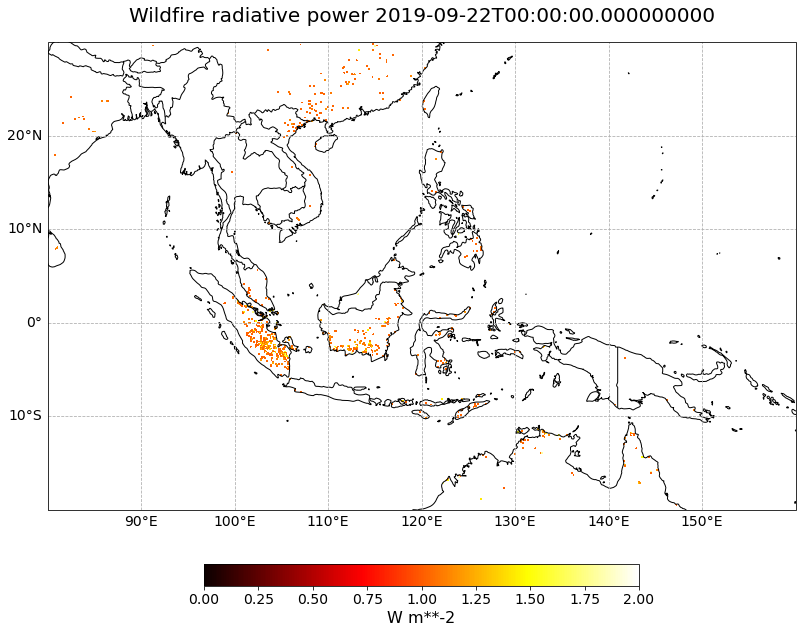

In [31]:
visualize_pcolormesh(data_array=np.exp(frpfire_subset.isel(time=0).data), 
                     longitude=frpfire_subset.longitude.data, 
                     latitude=frpfire_subset.latitude.data, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='hot', 
                     unit=unit, 
                     long_name=longname + ' ' + str(frpfire_subset.isel(time=0).time.data), 
                     vmin=0, 
                     vmax=2, 
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax, 
                     set_global=False)
  

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./261_CAMS_eac4_load_browse.ipynb"><< 261 - CAMS - EAC4 Global Reanalysis</a><span style="float:right;"><a href="./271_GEFF_fire_forecast_load_browse.ipynb">271 - GEFF Global ECMWF Fire Forecasting >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>